<img src="Archivos/miad4.png" width=900x>

 # TAREA 2

**Departamento de Ingeniería Industrial.**

**Maestría en Inteligencia Analítica para la Toma de Decisiones (Analytics).**

**Modelos de Análisis Estadístico (MIIA 4100) - 202320.**

Por ningún motivo se recibirán entregas posteriores a la hora límite. En caso de no realizar la entrega la nota asignada será 0.

Notas: La entrega del taller deberá hacerse en un informe autocontenido incluyendo las **gráficas,interpretación y conclusiones**. Adicionalmente debe entregarse el código utilizado dentro de este mismo notebook, de considerar necesario comentar todas las partes del codigo que crean necesarias para el entendimiento del codigo.

Para todos los literales que lo requieran, se recomienda utilizar una significancia del 5% (confianza del 95%). En caso de utilizar otro nivel de significancia, hacerlo explícito en el informe.

______________________________________________________________________



In [26]:
#Librerias que podria necesitar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Ejercicio 1
(35%) La base de datos contenida en diamantes.csv tiene información de los precios 53.940 diamantes teniendo en cuenta los carates, el corte, el color, la claridad, la profundidad, la longitud (x), el ancho (y) y la profundidad (z). <br>


a. (10%) Teniendo en cuenta los datos suministrados: ¿De qué variable o variables depende el valor de los diamantes?

In [4]:
# Implementa tu respuesta en esta celda
ruta = "./Archivos/diamonds.csv"
data_frame = pd.read_csv(ruta)
data_frame

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [6]:
data_frame['xyz'] = data_frame['x'] * data_frame['y'] * data_frame['z'] 
remover = ['x','y','z']
data_frame = data_frame.drop(remover, axis=1)
data_frame

,carat,cut,color,clarity,depth,table,price,xyz
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250
...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,115.920000
53936,0.72,Good,D,SI1,63.1,55.0,2757,118.110175
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,114.449728
53938,0.86,Premium,H,SI2,61.0,58.0,2757,140.766120


In [61]:
data_frame.describe()

,carat,depth,table,price,xyz
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,129.849403
std,0.474011,1.432621,2.234491,3989.439738,78.245262
min,0.200000,43.000000,43.000000,326.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,65.136830
50%,0.700000,61.800000,57.000000,2401.000000,114.808572
75%,1.040000,62.500000,59.000000,5324.250000,170.842451
max,5.010000,79.000000,95.000000,18823.000000,3840.598060


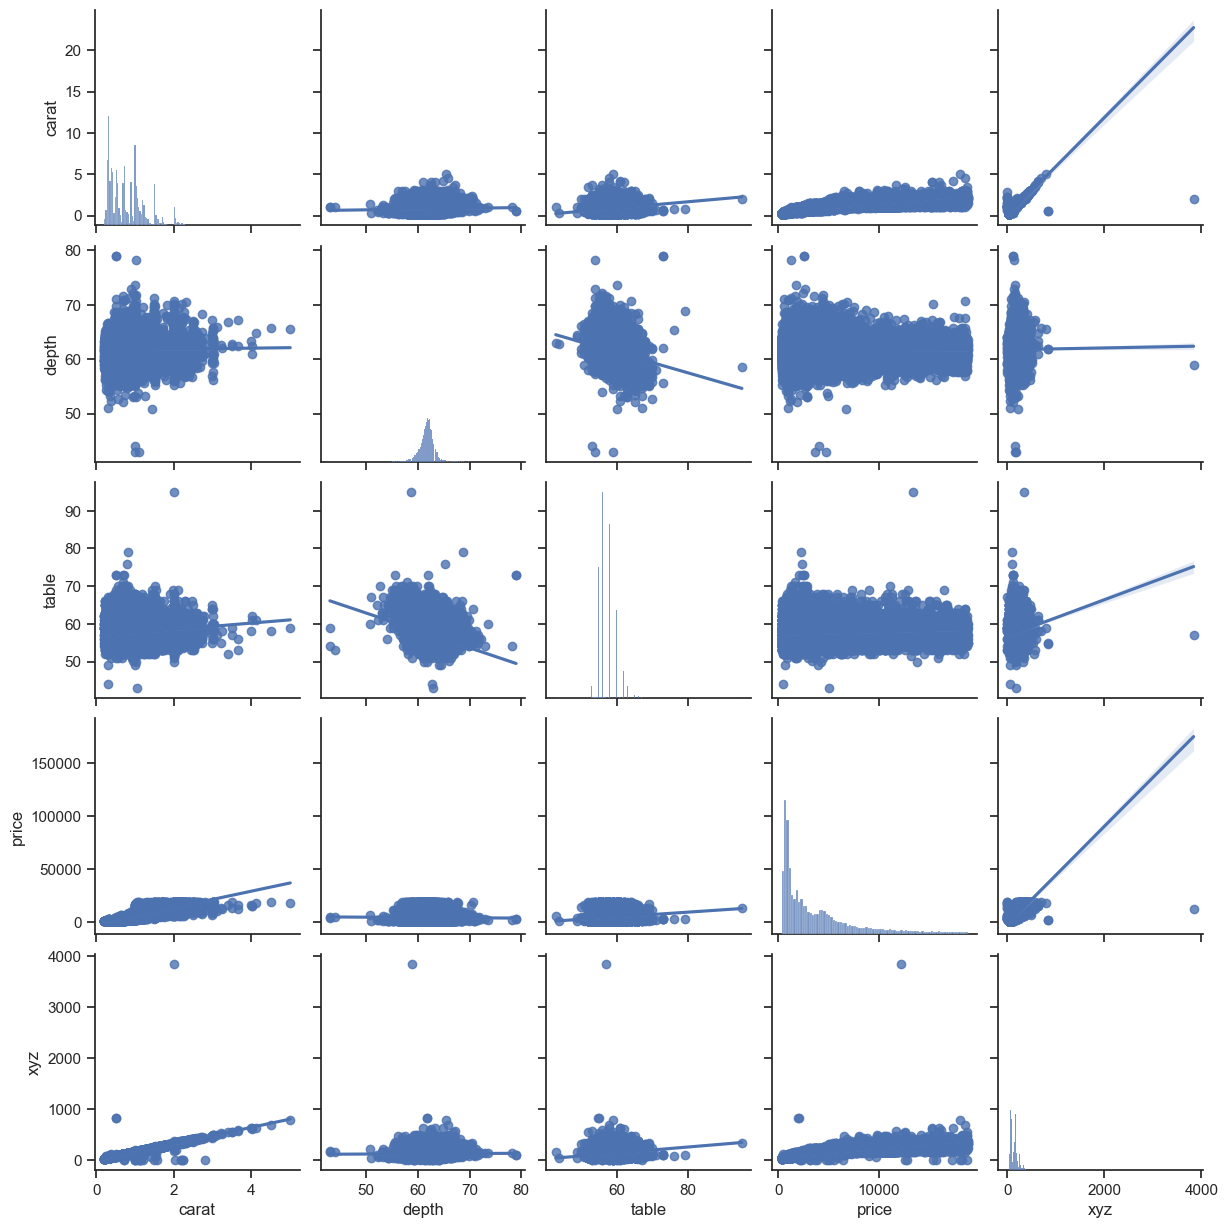

In [9]:
# EDA
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
sns.pairplot(data_frame, kind="reg")
#put correlation matrix here
plt.show()

/var/folders/cw/dvczbrmn4d7g1pplvzvyvc2h0000gn/T/ipykernel_12329/1462901814.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_frame.corr()


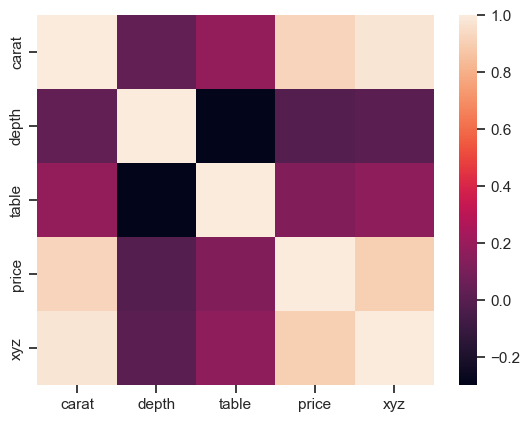

In [10]:
# Plot correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
corr = data_frame.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [12]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [19]:
model = smf.ols('price ~ carat', data=data_frame).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 3.041e+05
Date:                Sun, 22 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:37:06   Log-Likelihood:            -4.7273e+05
No. Observations:               53940   AIC:                         9.455e+05
Df Residuals:                   53938   BIC:                         9.455e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2256.3606     13.055   -172.830      0.0

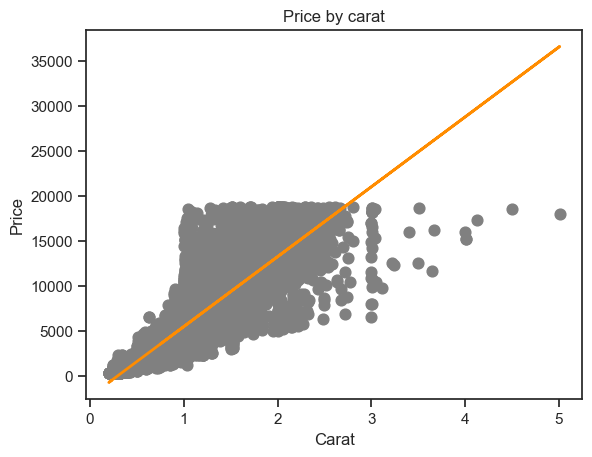

In [20]:
plt.scatter(data_frame['carat'], data_frame['price'], color='grey', s=60)
plt.title('Price by carat')
plt.xlabel('Carat')
plt.ylabel('Price')

# Plotting the regression line
plt.plot(data_frame['carat'], model.fittedvalues, color='darkorange', linewidth=2)

plt.show()

Se puden evidenciar probelmas de Heretoscedasticidad y colas largas. Se debe realizar uns transformación de Variable respuesta y


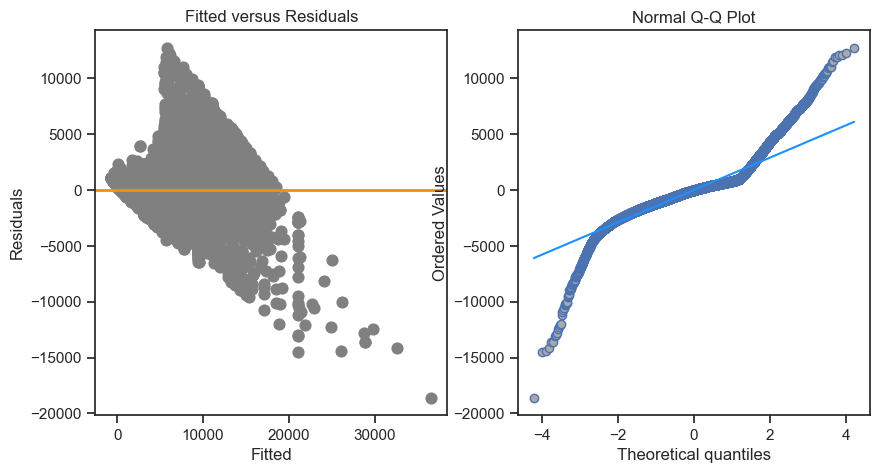

In [23]:
from scipy import stats
fig, ax = plt.subplots(1, 2, figsize=(10,5))

# Fitted vs Residuals Plot
ax[0].scatter(model.fittedvalues, model.resid, color='grey', s=60)
ax[0].axhline(y=0, color='darkorange', linewidth=2)
ax[0].set_title('Fitted versus Residuals')
ax[0].set_xlabel('Fitted')
ax[0].set_ylabel('Residuals')

# Q-Q Plot using scipy's probplot
stats.probplot(model.resid, plot=ax[1], fit=True)
ax[1].get_lines()[0].set_markerfacecolor('darkgrey')  # Changing the color of the dots to 'darkgrey'
ax[1].get_lines()[1].set_color('dodgerblue')  # Changing the color of the line to 'dodgerblue'
ax[1].set_title('Normal Q-Q Plot')

print('Se puden evidenciar probelmas de Heretoscedasticidad y colas largas. Se debe realizar uns transformación de Variable respuesta y')

El modelo mejora pero aún presenta problemas de heteroscedasticidad

In [40]:
rmse_manual_original = np.sqrt(np.mean((data_frame['price'] - model.fittedvalues) ** 2))
rmse_manual_log_transformed = np.sqrt(np.mean((data_frame['price'] - np.exp(model_log.fittedvalues)) ** 2))

print('RMSE Original:', rmse_manual_original)
print('RMSE Log Transformed:', rmse_manual_log_transformed)
print('Aumenta el error')

RMSE Original: 1548.5331930613174
RMSE Log Transformed: 46622.89398817015
Aumenta el error


Probando con varias opciones de logaritmos

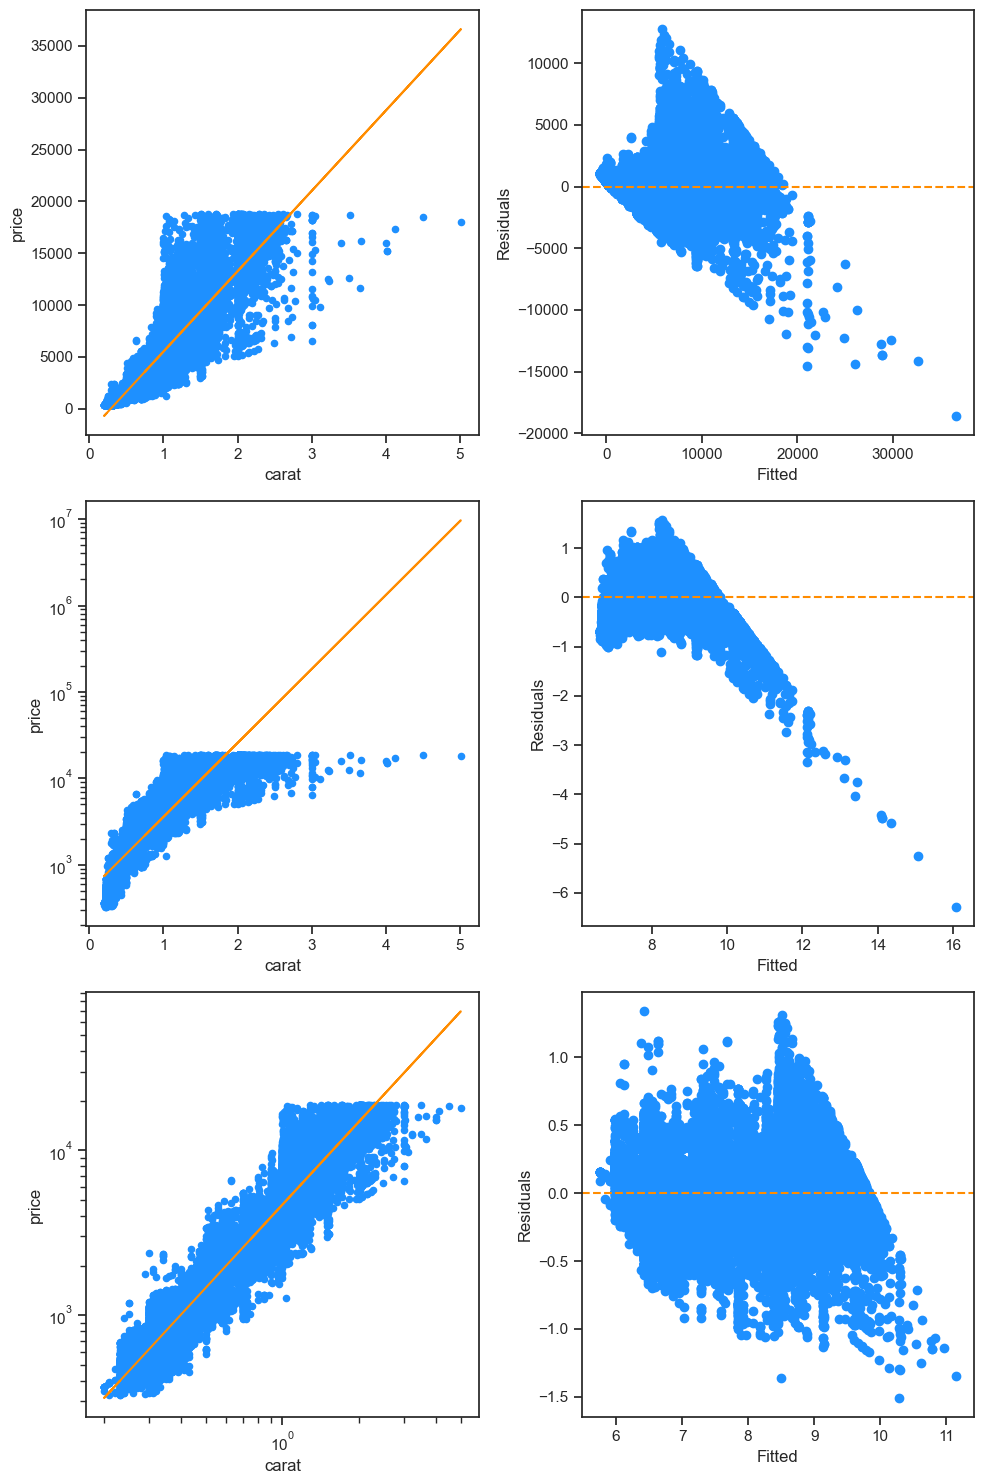

In [44]:
fig, axs = plt.subplots(3, 2, figsize=(10,15))

# First Row Plots
carat_price = smf.ols('price ~ carat', data=data_frame).fit()
data_frame.plot.scatter(x='carat', y='price', ax=axs[0, 0], color='dodgerblue')
axs[0, 0].plot(data_frame['carat'], carat_price.fittedvalues, color='darkorange')
axs[0, 1].scatter(carat_price.fittedvalues, carat_price.resid, color='dodgerblue')
axs[0, 1].axhline(y=0, linestyle='--', color='darkorange')

# Second Row Plots
carat_price_log = smf.ols('np.log(price) ~ carat', data=data_frame).fit()
data_frame.plot.scatter(x='carat', y='price', ax=axs[1, 0], color='dodgerblue', logy=True)
axs[1, 0].plot(data_frame['carat'], np.exp(carat_price_log.fittedvalues), color='darkorange')
axs[1, 1].scatter(carat_price_log.fittedvalues, carat_price_log.resid, color='dodgerblue')
axs[1, 1].axhline(y=0, linestyle='--', color='darkorange')

# Third Row Plots
carat_price_loglog = smf.ols('np.log(price) ~ np.log(carat)', data=data_frame).fit()
data_frame.plot.scatter(x='carat', y='price', ax=axs[2, 0], color='dodgerblue', loglog=True)
axs[2, 0].plot(data_frame['carat'], np.exp(carat_price_loglog.fittedvalues), color='darkorange')
axs[2, 1].scatter(carat_price_loglog.fittedvalues, carat_price_loglog.resid, color='dodgerblue')
axs[2, 1].axhline(y=0, linestyle='--', color='darkorange')

# Adjust labels
for i in range(3):
    axs[i, 0].set_xlabel('carat')
    axs[i, 0].set_ylabel('price')
    axs[i, 1].set_xlabel('Fitted')
    axs[i, 1].set_ylabel('Residuals')

plt.tight_layout()
plt.show()

El que mejor se ajusta es el modelo 'carat_price_loglog'

In [45]:
print(carat_price_loglog.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 7.510e+05
Date:                Sun, 22 Oct 2023   Prob (F-statistic):               0.00
Time:                        23:25:06   Log-Likelihood:                -4424.2
No. Observations:               53940   AIC:                             8852.
Df Residuals:                   53938   BIC:                             8870.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.4487      0.001   6190.896

In [46]:
rmse_manual_original = np.sqrt(np.mean((data_frame['price'] - model.fittedvalues) ** 2))
rmse_manual_log_transformed = np.sqrt(np.mean((data_frame['price'] - np.exp(carat_price_loglog.fittedvalues)) ** 2))

print('RMSE Original:', rmse_manual_original)
print('RMSE Log Transformed:', rmse_manual_log_transformed)
print('Aumenta el error')

RMSE Original: 1548.5331930613174
RMSE Log Transformed: 1654.1684819553857
Aumenta el error


Text(0.5, 1.0, 'Normal Q-Q Plot')

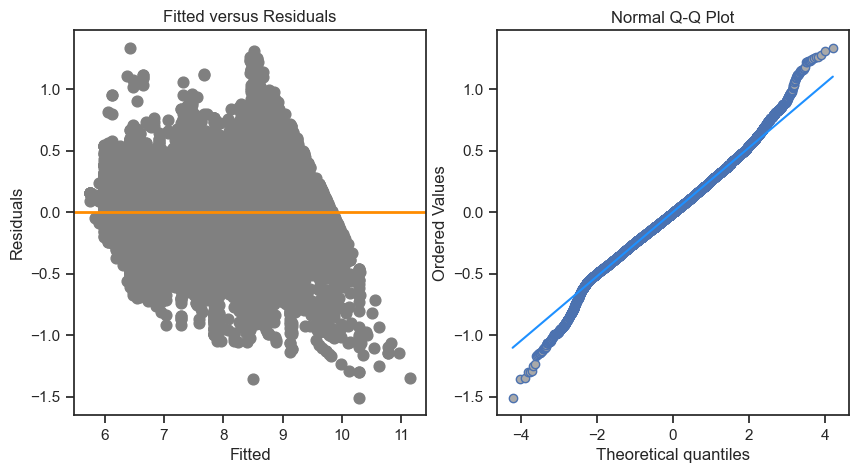

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

# Fitted vs Residuals Plot
ax[0].scatter(carat_price_loglog.fittedvalues, carat_price_loglog.resid, color='grey', s=60)
ax[0].axhline(y=0, color='darkorange', linewidth=2)
ax[0].set_title('Fitted versus Residuals')
ax[0].set_xlabel('Fitted')
ax[0].set_ylabel('Residuals')

# Q-Q Plot using scipy's probplot
stats.probplot(carat_price_loglog.resid, plot=ax[1], fit=True)
ax[1].get_lines()[0].set_markerfacecolor('darkgrey')  # Changing the color of the dots to 'darkgrey'
ax[1].get_lines()[1].set_color('dodgerblue')  # Changing the color of the line to 'dodgerblue'
ax[1].set_title('Normal Q-Q Plot')

b. (10%) Realice un modelo de regresión lineal múltiple para el precio de cada diamante teniendo en cuenta la longitud, el ancho y la profundidad de los diamantes, ponga su ecuación y estime los valores de los diamantes para los siguientes tamaños:
|<center>X</center>|<center>Y</center>|<center>Z</center>|
|-----------|-----------|-----------|
|3.10|<center>3.17</center>| 3.43|
|4.14|<center>3.25</center>|3.11|
|4.00|<center>4.45</center>|3.14|
|4.22|<center>4.14</center>|4.15|
|4.14|<center>2.35</center>|2.85|
|2.94|<center>4.96</center>|4.12|
|4.95|<center>5.10</center>|3.47|
|4.17|<center>4.01</center>|5.13|
|2.77|<center>3.65</center>|5.17|
|4.15|<center>3.05</center>|3.18|
|4.16|<center>3.15</center>|4.17|
|3.90|<center>4.12</center>|3.16|

¿Qué puede concluir de los resultados obtenidos?

In [48]:
# Implementa tu respuesta en esta celda
xyz_price = smf.ols('price ~ xyz', data=data_frame).fit()

In [49]:
print(xyz_price.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                 2.365e+05
Date:                Sun, 22 Oct 2023   Prob (F-statistic):               0.00
Time:                        23:33:44   Log-Likelihood:            -4.7837e+05
No. Observations:               53940   AIC:                         9.567e+05
Df Residuals:                   53938   BIC:                         9.568e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2041.4788     14.342   -142.340      0.0

Text(0.5, 1.0, 'Normal Q-Q Plot')

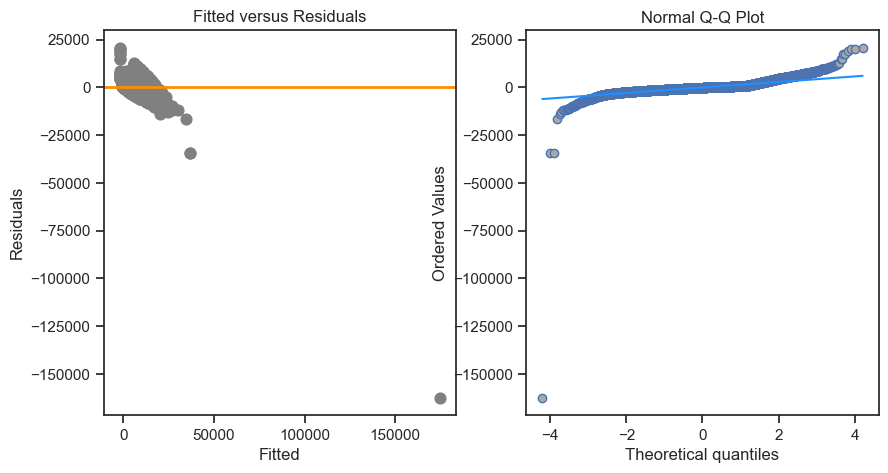

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

# Fitted vs Residuals Plot
ax[0].scatter(xyz_price.fittedvalues, xyz_price.resid, color='grey', s=60)
ax[0].axhline(y=0, color='darkorange', linewidth=2)
ax[0].set_title('Fitted versus Residuals')
ax[0].set_xlabel('Fitted')
ax[0].set_ylabel('Residuals')

# Q-Q Plot using scipy's probplot
stats.probplot(xyz_price.resid, plot=ax[1], fit=True)
ax[1].get_lines()[0].set_markerfacecolor('darkgrey')  # Changing the color of the dots to 'darkgrey'
ax[1].get_lines()[1].set_color('dodgerblue')  # Changing the color of the line to 'dodgerblue'
ax[1].set_title('Normal Q-Q Plot')

In [60]:
from statsmodels.stats.outliers_influence import OLSInfluence

# Calculate Cook's distance for model 
cooks_distance = xyz_price.get_influence().cooks_distance

# Calculate the threshold for Cook's distance using the length of cooks_distance[0]
n = len(cooks_distance[0])
threshold = 4 / n

outliers = []
for i in range(n):
    if cooks_distance[0][i] > threshold:
        outliers.append(cooks_distance[0][i])

outliers

[9.058984900124719e-05,
 8.734590784899598e-05,
 8.837141496331349e-05,
 0.00015049204637836803,
 7.517696764685437e-05,
 0.00010714523896754033,
 8.210931913284798e-05,
 0.0001076764346564257,
 0.0003591355894862844,
 0.00010499474326216215,
 0.0001280461640935924,
 0.0003173895753457641,
 0.0003173895753457641,
 0.0003163832340274509,
 7.444499717735308e-05,
 0.00031944243622779,
 9.697352489094764e-05,
 0.00022140224330573167,
 0.00031413400242697473,
 9.396689284748905e-05,
 9.06861622007008e-05,
 8.080338216050961e-05,
 9.385412096677944e-05,
 0.0001018266354130326,
 9.033091579098349e-05,
 0.000272229208677295,
 0.0003000519191367388,
 0.000267054131840939,
 0.00033840154300732585,
 0.0002663949515573931,
 9.611624341005074e-05,
 7.595032650220128e-05,
 0.0003876260855449399,
 0.00022165348684276227,
 9.150561540091421e-05,
 8.514259418404765e-05,
 9.284047559424996e-05,
 0.0002388851927103253,
 0.0002802348385585899,
 0.00022621231111024027,
 7.755798995418887e-05,
 0.0002109679

In [64]:
df = data_frame[~data_frame['price'].isin(outliers)]

In [65]:
df

,carat,cut,color,clarity,depth,table,price,xyz
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250
...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,115.920000
53936,0.72,Good,D,SI1,63.1,55.0,2757,118.110175
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,114.449728
53938,0.86,Premium,H,SI2,61.0,58.0,2757,140.766120


c. (10%) Realice un modelo de regresión lineal simple para el precio de cada diamante teniendo en cuenta los carates de los diamantes, ponga su ecuación. Responda las siguientes preguntas: <br>

- ¿Es cierta la hipótesis que afirma que la los carates no influyen en el valor de los diamantes?
- Hallé el coeficiente de correlación.
- ¿Qué puede decir de la homocedasticidad? Justifique y grafique. 



In [ ]:
# Implementa tu respuesta en esta celda



In [ ]:
# Implementa tu respuesta en esta celda



In [ ]:
# Implementa tu respuesta en esta celda



## Ejercicio 2

(30%) 30%) Teniendo en cuenta la base de datos contenida en taxis.cvs, donde se muestran los datos de 6433 carreras de taxis, con su fecha de recogida, de bajada de los pasajeros, el número de pasajeros, las distancias, las tarifas, las propinas, el método de pago, la zona de recogida y de bajada.  <br>

a. (15%) Realice un modelo de regresión lineal simple para el precio de cada carrera teniendo en cuenta el tiempo que esta se demoró en minutos, ponga su ecuación. Responda las siguientes preguntas:
- ¿Es cierta la hipótesis que afirma que el tiempo no influye en el valor de la carrera?
- Hallé el coeficiente de correlación.
- ¿Qué puede decir de la homocedasticidad? Justifique y grafique.


In [66]:
# Implementa tu respuesta en esta celda
ruta = './Archivos/taxis.csv'
data_frame = pd.read_csv(ruta)
data_frame

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


In [182]:
ruta = './Archivos/taxis.csv'
data_frame_taxi = pd.read_csv(ruta)
distancias = data_frame_taxi['distance'].unique()
data_frame_taxi['total'].describe()

count    6433.000000
mean       18.517794
std        13.815570
min         1.300000
25%        10.800000
50%        14.160000
75%        20.300000
max       174.820000
Name: total, dtype: float64

In [68]:
from datetime import datetime

In [70]:
#formato = '%Y-%m-%d %H:%M:%S'
data_frame['pickup'] = pd.to_datetime(data_frame['pickup'])
data_frame['dropoff'] = pd.to_datetime(data_frame['dropoff'])

data_frame['minutos'] = data_frame['dropoff'].dt.tot - data_frame['pickup']
data_frame

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,minutos
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,0 days 00:06:15
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,0 days 00:07:05
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,0 days 00:07:24
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,0 days 00:25:52
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,0 days 00:09:32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan,0 days 00:03:34
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx,0 days 00:56:23
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn,0 days 00:19:07
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn,0 days 00:05:04


In [82]:
for i in range(len(data_frame['minutos'])):
    data_frame['minutos'][i] = data_frame['minutos'][i].total_seconds()/60

/var/folders/cw/dvczbrmn4d7g1pplvzvyvc2h0000gn/T/ipykernel_12329/3226867284.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame['minutos'][i] = data_frame['minutos'][i].total_seconds()/60


In [87]:
data_frame['minutos'] = data_frame['minutos'].astype(float)

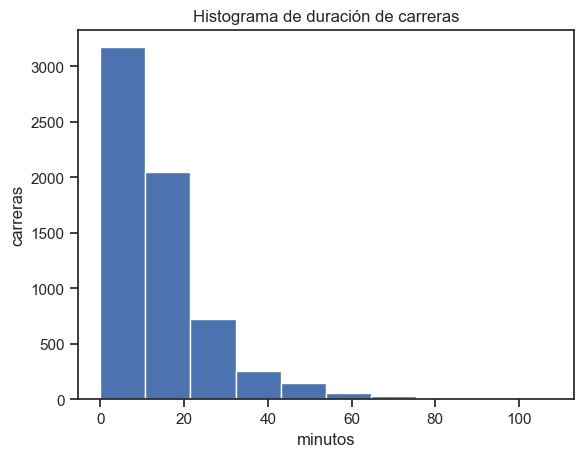

In [106]:
plt.hist(data_frame['minutos'])
plt.xlabel('minutos')
plt.ylabel('carreras')
plt.title('Histograma de duración de carreras')
plt.show()

In [88]:
modelo_taxi = smf.ols('fare ~ minutos', data=data_frame).fit()

In [89]:
print(modelo_taxi.summary())

                            OLS Regression Results                            
Dep. Variable:                   fare   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                 1.647e+04
Date:                Mon, 23 Oct 2023   Prob (F-statistic):               0.00
Time:                        14:47:25   Log-Likelihood:                -20783.
No. Observations:                6433   AIC:                         4.157e+04
Df Residuals:                    6431   BIC:                         4.158e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0179      0.121      8.403      0.0

Ecuación del modelo de regresión lineal

$$\hat y = 1.01 + 0.84 x_1 + e$$

Text(0.5, 1.0, 'Normal Q-Q Plot')

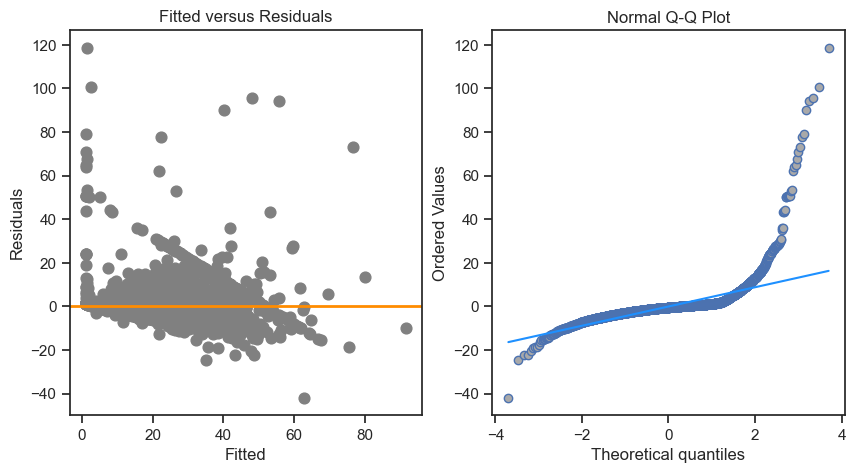

In [90]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

# Fitted vs Residuals Plot
ax[0].scatter(modelo_taxi.fittedvalues, modelo_taxi.resid, color='grey', s=60)
ax[0].axhline(y=0, color='darkorange', linewidth=2)
ax[0].set_title('Fitted versus Residuals')
ax[0].set_xlabel('Fitted')
ax[0].set_ylabel('Residuals')

# Q-Q Plot using scipy's probplot
stats.probplot(modelo_taxi.resid, plot=ax[1], fit=True)
ax[1].get_lines()[0].set_markerfacecolor('darkgrey')  # Changing the color of the dots to 'darkgrey'
ax[1].get_lines()[1].set_color('dodgerblue')  # Changing the color of the line to 'dodgerblue'
ax[1].set_title('Normal Q-Q Plot')

Text(0.5, 1.0, 'Normal Q-Q Plot')

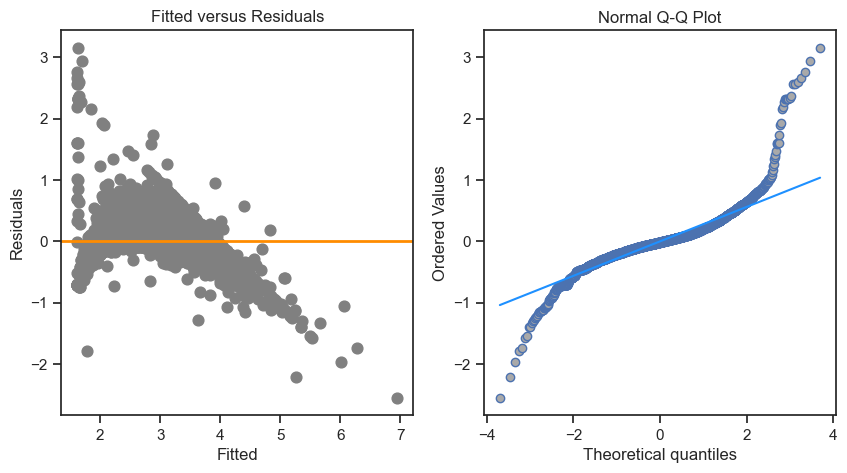

In [103]:
# Transformación logaritmo
fare_min_log = smf.ols('np.log(fare) ~ minutos', data=data_frame).fit()

fig, ax = plt.subplots(1, 2, figsize=(10,5))
# Fitted vs Residuals Plot
ax[0].scatter(fare_min_log.fittedvalues, fare_min_log.resid, color='grey', s=60)
ax[0].axhline(y=0, color='darkorange', linewidth=2)
ax[0].set_title('Fitted versus Residuals')
ax[0].set_xlabel('Fitted')
ax[0].set_ylabel('Residuals')

# Q-Q Plot using scipy's probplot
stats.probplot(fare_min_log.resid, plot=ax[1], fit=True)
ax[1].get_lines()[0].set_markerfacecolor('darkgrey')  # Changing the color of the dots to 'darkgrey'
ax[1].get_lines()[1].set_color('dodgerblue')  # Changing the color of the line to 'dodgerblue'
ax[1].set_title('Normal Q-Q Plot')

In [95]:
print(fare_min_log.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(fare)   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                 2.328e+04
Date:                Mon, 23 Oct 2023   Prob (F-statistic):               0.00
Time:                        15:13:44   Log-Likelihood:                -1449.2
No. Observations:                6433   AIC:                             2902.
Df Residuals:                    6431   BIC:                             2916.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6173      0.006    269.597      0.0

Realizando una transformación logaritmica al modelo, se puede evidenciar que el Adj. R-squared mejoro de 0.719 a 7.84

#### Ecuación de la regresión lineal

$$\hat y = 1.61 + 0.045x_1 + e$$

A partir de la evaluación generada por el modelo, se puede determinar que la duración de la carrera tiene un impacto positivo sobre el precio de la carrera

#### Coeficiente de correlación

In [113]:
# Implementa tu respuesta en esta celda
variables = data_frame[['fare','minutos']]
correlation_matrix = variables.corr()

correlation = correlation_matrix.loc['fare', 'minutos']
print("Coeficiente de correlación de Pearson:", correlation)

Coeficiente de correlación de Pearson: 0.8480675414505969


In [122]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

In [123]:
# Implementa tu respuesta en esta celda
bp_test = het_breuschpagan(fare_min_log.resid, fare_min_log.model.exog)
print(f"Breusch-Pagan test :\nLM Statistic: {bp_test[0]}\nLM-Test p-value: {bp_test[1]}\nF-Statistic: {bp_test[2]}\nF-Test p-value: {bp_test[3]}\n")

Breusch-Pagan test :
LM Statistic: 167.88484660587707
LM-Test p-value: 3.501617966568713e-37
F-Statistic: 86.15161391654306
F-Test p-value: 1.194958982313812e-37



#### Homoscedasticidad

Los resultados obtenidos en las pruebas LM-Test y F-Test son muy cercanos a 0 por lo que se rechaza la Ho y se acepta la H1, por lo tanto el modelo sigue presentando problemas de Heteroscedasticidad

b. (15%) Realice un modelo de regresión lineal simple para el precio de cada carrera teniendo en cuenta la distancia, ponga su ecuación. Responda las siguientes preguntas:
- ¿Es cierta la hipótesis que afirma que la distancia influye en el valor de la carrera?
- Hallé el coeficiente de correlación.
- ¿Qué puede decir de la homocedasticidad? Justifique y grafique.


In [128]:
# Implementa tu respuesta en esta celda
fare_distance = smf.ols('fare ~ distance', data=data_frame).fit()

In [129]:
print(fare_distance.summary())

                            OLS Regression Results                            
Dep. Variable:                   fare   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                 3.549e+04
Date:                Mon, 23 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:57:33   Log-Likelihood:                -18838.
No. Observations:                6433   AIC:                         3.768e+04
Df Residuals:                    6431   BIC:                         3.769e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6926      0.072     65.263      0.0

#### Ecuación del modelo de regresión lineal

$$\hat y = 4.69 + 2.77 x_1 + e$$

A partir de la evaluación generada por el modelo, se puede determinar que la distancia tiene un impacto positivo sobre el precio de la carrera

Text(0.5, 1.0, 'Normal Q-Q Plot')

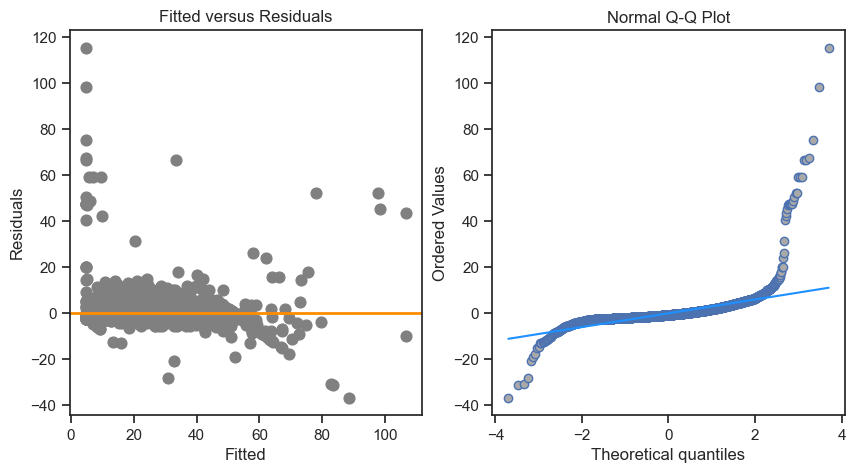

In [130]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

# Fitted vs Residuals Plot
ax[0].scatter(fare_distance.fittedvalues, fare_distance.resid, color='grey', s=60)
ax[0].axhline(y=0, color='darkorange', linewidth=2)
ax[0].set_title('Fitted versus Residuals')
ax[0].set_xlabel('Fitted')
ax[0].set_ylabel('Residuals')

# Q-Q Plot using scipy's probplot
stats.probplot(fare_distance.resid, plot=ax[1], fit=True)
ax[1].get_lines()[0].set_markerfacecolor('darkgrey')  # Changing the color of the dots to 'darkgrey'
ax[1].get_lines()[1].set_color('dodgerblue')  # Changing the color of the line to 'dodgerblue'
ax[1].set_title('Normal Q-Q Plot')

#### Coeficiente de correlación

In [121]:
# Implementa tu respuesta en esta celda
# Coeficiente de correlación de Pearson
variables = data_frame[['fare','distance']]
correlation_matrix = variables.corr()

correlation = correlation_matrix.loc['fare', 'distance']
print("Coeficiente de correlación de Pearson:", correlation)


Coeficiente de correlación de Pearson: 0.9201077027895732


In [124]:
# Implementa tu respuesta en esta celda
# Prueba de homoscedasticidad
bp_test = het_breuschpagan(modelo_taxi_2.resid, modelo_taxi_2.model.exog)
print(f"Breusch-Pagan test :\nLM Statistic: {bp_test[0]}\nLM-Test p-value: {bp_test[1]}\nF-Statistic: {bp_test[2]}\nF-Test p-value: {bp_test[3]}\n")


Breusch-Pagan test :
LM Statistic: 20.844803278826824
LM-Test p-value: 4.980417112520144e-06
F-Statistic: 20.906064462488775
F-Test p-value: 4.913957423040528e-06



#### Homoscedasticidad

Los resultados obtenidos en las pruebas LM-Test y F-Test son muy cercanos a 0 por lo que se rechaza la Ho y se acepta la H1, por lo tanto el modelo sigue presentando problemas de Heteroscedasticidad

## Ejercicio 3

(35%) De acuerdo con la base de datos de Boston.cvs, en la cual se muestran el valor promedio de 506 predios en $1000’s y las siguientes variables:

|<center>Index</center>|<center>Meaning</center>|
|-----------|-----------|
|<center> 1. CRIM|<center>per capita crime rate by town</center>|
|<center> 2. ZN|<center>proportion of residential land zoned for lots over 25,000 sq.ft.</center>|
|<center> 3. INDUS|<center>proportion of non-retail business acres per town</center>|
|<center> 4. CHAS|<center>Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)</center>|
|<center> 5. NOX|<center>nitric oxides concentration (parts per 10 million)</center>|
|<center> 6. RM|<center>average number of rooms per dwelling</center>|
|<center> 7. AGE|<center>proportion of owner-occupied units built prior to 1940</center>|
|<center> 8. DIS|<center>weighted distances to five Boston employment centres</center>|
|<center> 9. RAD|<center>index of accessibility to radial highways</center>|
|<center> 10. TAX|<center>full-value property-tax rate per 10,000</center>|
| 11. PTRATIO|<center>pupil-teacher ratio by town</center>|
|<center> 12. B|<center>1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town</center>|
|<center> 13. LSTAT|<center>% lower status of the population</center>|
|<center> 14. MEDV|<center>Median value of owner-occupied homes in $1000's</center>|

b. (10%)  Determine las caracteristicas mas influyentes en el precio de las viviendas de Boston. Realice los analisis que considere relevantes como analisis de correlación o graficas de donde se interpreten los resultados.

In [115]:
# Implementa tu respuesta en esta celda
ruta = './Archivos/dataset_boston.csv'
data_frame_3 = pd.read_csv(ruta, sep=";")
data_frame_3

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


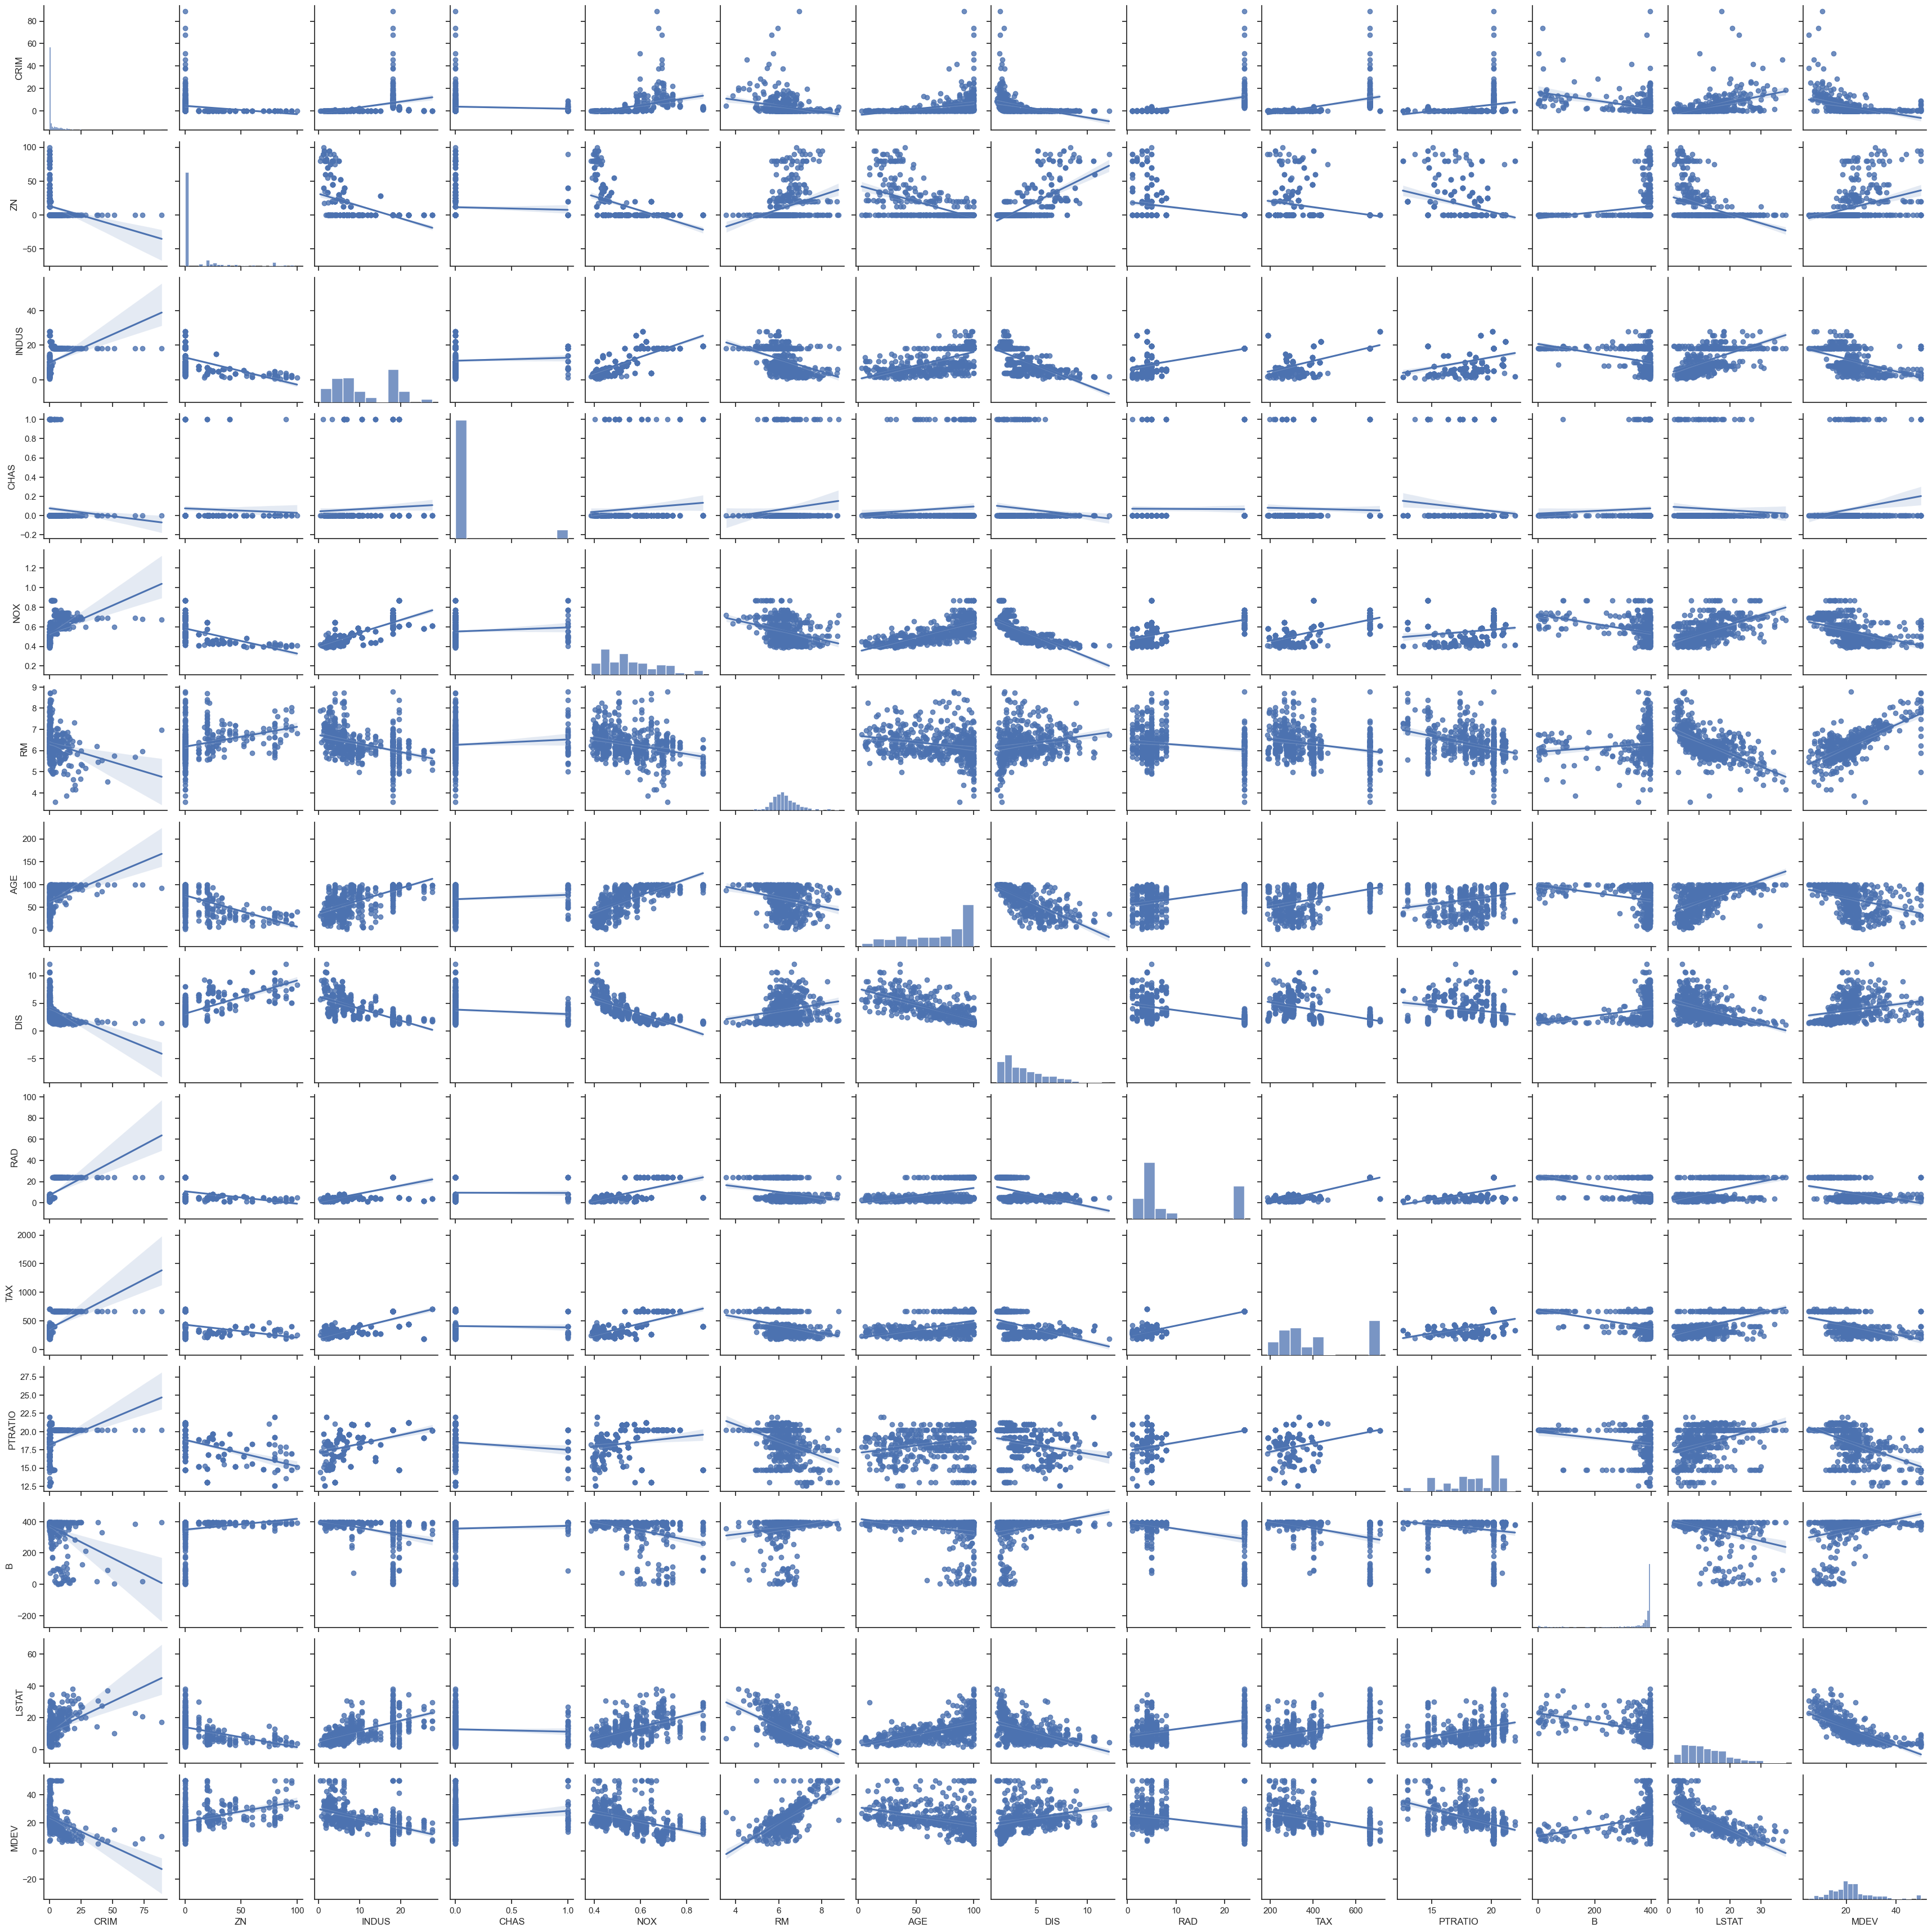

In [133]:
# EDA
sns.set(style="ticks", color_codes=True)
sns.pairplot(data_frame_3, kind="reg")
#put correlation matrix here
plt.show()

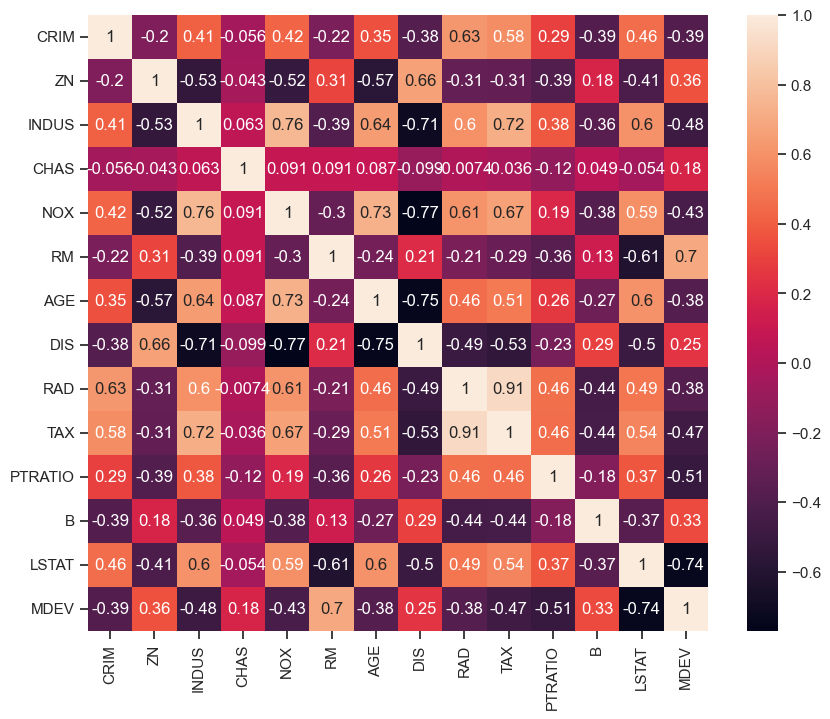

In [143]:
# Plot correlation matrix
corr = data_frame_3.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, 
            annot= True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [137]:
variable_dependiente = 'MDEV'
variable_independiente = data_frame_3.columns.to_list()
variable_independiente.remove(variable_dependiente)

modelo_3 = smf.ols(variable_dependiente + '~' + '+'.join(variable_independiente), data=data_frame_3).fit()
print(modelo_3.summary())

                            OLS Regression Results                            
Dep. Variable:                   MDEV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 23 Oct 2023   Prob (F-statistic):          6.72e-135
Time:                        19:32:12   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

In [155]:
variable_dependiente = 'MDEV'
variable_independiente = ['CRIM','NOX','AGE','RAD','TAX','LSTAT','PTRATIO']

modelo_3_a = smf.ols(variable_dependiente + '~' + '+'.join(variable_independiente), data=data_frame_3).fit()
print(modelo_3_a.summary())

                            OLS Regression Results                            
Dep. Variable:                   MDEV   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     128.7
Date:                Mon, 23 Oct 2023   Prob (F-statistic):          2.16e-107
Time:                        19:50:02   Log-Likelihood:                -1579.0
No. Observations:                 506   AIC:                             3174.
Df Residuals:                     498   BIC:                             3208.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.2193      2.986     20.837      0.0

In [162]:
variable_dependiente = 'MDEV'
variable_independiente = ['CRIM','NOX','AGE','RAD','TAX','LSTAT','PTRATIO','RM','INDUS']

modelo_3_a = smf.ols(variable_dependiente + '~' + '+'.join(variable_independiente), data=data_frame_3).fit()
print(modelo_3_a.summary())

                            OLS Regression Results                            
Dep. Variable:                   MDEV   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     127.7
Date:                Mon, 23 Oct 2023   Prob (F-statistic):          4.35e-123
Time:                        19:54:49   Log-Likelihood:                -1536.9
No. Observations:                 506   AIC:                             3094.
Df Residuals:                     496   BIC:                             3136.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.3671      4.771      6.155      0.0

Text(0.5, 1.0, 'Normal Q-Q Plot')

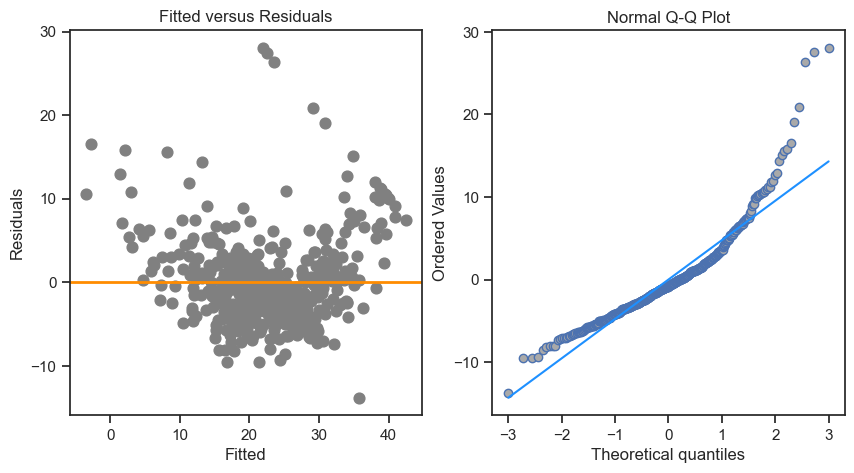

In [164]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

# Fitted vs Residuals Plot
ax[0].scatter(modelo_3_a.fittedvalues, modelo_3_a.resid, color='grey', s=60)
ax[0].axhline(y=0, color='darkorange', linewidth=2)
ax[0].set_title('Fitted versus Residuals')
ax[0].set_xlabel('Fitted')
ax[0].set_ylabel('Residuals')

# Q-Q Plot using scipy's probplot
stats.probplot(modelo_3_a.resid, plot=ax[1], fit=True)
ax[1].get_lines()[0].set_markerfacecolor('darkgrey')  # Changing the color of the dots to 'darkgrey'
ax[1].get_lines()[1].set_color('dodgerblue')  # Changing the color of the line to 'dodgerblue'
ax[1].set_title('Normal Q-Q Plot')

Text(0.5, 1.0, 'Normal Q-Q Plot')

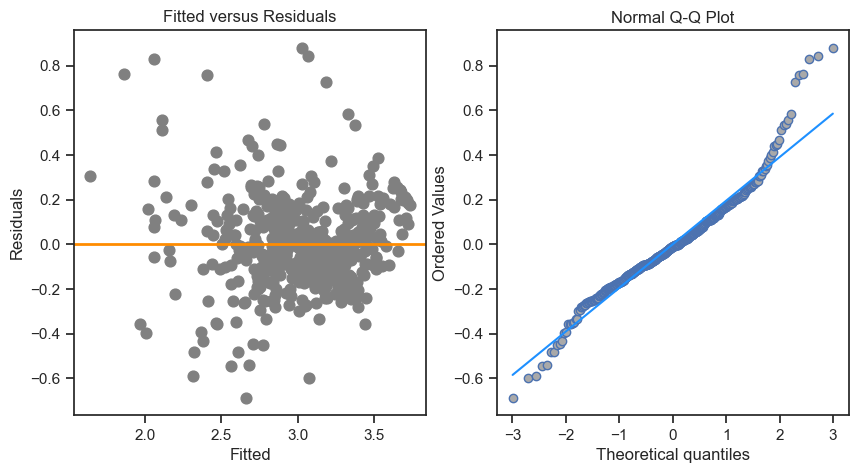

In [166]:
modelo_3_a_log = smf.ols('np.log(MDEV)' + '~' + '+'.join(variable_independiente), data=data_frame_3).fit()

fig, ax = plt.subplots(1, 2, figsize=(10,5))

# Fitted vs Residuals Plot
ax[0].scatter(modelo_3_a_log.fittedvalues, modelo_3_a_log.resid, color='grey', s=60)
ax[0].axhline(y=0, color='darkorange', linewidth=2)
ax[0].set_title('Fitted versus Residuals')
ax[0].set_xlabel('Fitted')
ax[0].set_ylabel('Residuals')

# Q-Q Plot using scipy's probplot
stats.probplot(modelo_3_a_log.resid, plot=ax[1], fit=True)
ax[1].get_lines()[0].set_markerfacecolor('darkgrey')  # Changing the color of the dots to 'darkgrey'
ax[1].get_lines()[1].set_color('dodgerblue')  # Changing the color of the line to 'dodgerblue'
ax[1].set_title('Normal Q-Q Plot')

In [167]:
print(modelo_3_a_log.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(MDEV)   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     176.6
Date:                Mon, 23 Oct 2023   Prob (F-statistic):          1.69e-148
Time:                        20:14:33   Log-Likelihood:                 98.570
No. Observations:                 506   AIC:                            -177.1
Df Residuals:                     496   BIC:                            -134.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8975      0.188     20.695      0.0

Text(0.5, 1.0, 'Normal Q-Q Plot')

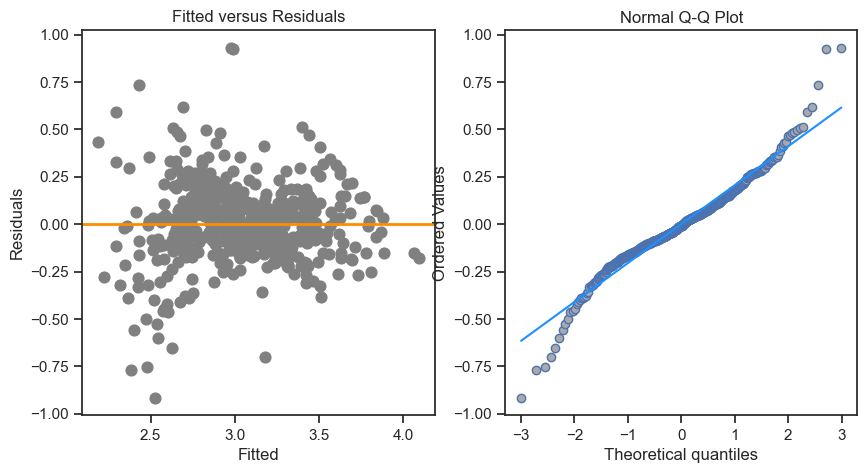

In [168]:
modelo_3_a_log_2 = smf.ols('np.log(MDEV) ~ np.log(CRIM) + np.log(NOX) + np.log(AGE) + np.log(TAX) + np.log(LSTAT) + np.log(PTRATIO) + np.log(RM) + np.log(INDUS)', data=data_frame_3).fit()

fig, ax = plt.subplots(1, 2, figsize=(10,5))

# Fitted vs Residuals Plot
ax[0].scatter(modelo_3_a_log_2.fittedvalues, modelo_3_a_log_2.resid, color='grey', s=60)
ax[0].axhline(y=0, color='darkorange', linewidth=2)
ax[0].set_title('Fitted versus Residuals')
ax[0].set_xlabel('Fitted')
ax[0].set_ylabel('Residuals')

# Q-Q Plot using scipy's probplot
stats.probplot(modelo_3_a_log_2.resid, plot=ax[1], fit=True)
ax[1].get_lines()[0].set_markerfacecolor('darkgrey')  # Changing the color of the dots to 'darkgrey'
ax[1].get_lines()[1].set_color('dodgerblue')  # Changing the color of the line to 'dodgerblue'
ax[1].set_title('Normal Q-Q Plot')

In [169]:
print(modelo_3_a_log_2.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(MDEV)   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     175.4
Date:                Mon, 23 Oct 2023   Prob (F-statistic):          1.92e-139
Time:                        20:23:07   Log-Likelihood:                 74.517
No. Observations:                 506   AIC:                            -131.0
Df Residuals:                     497   BIC:                            -93.00
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.3400      0.420     

a. (25%) Con el conjunto de datos suministrado de Boston, realizen un modelo de regresion múltiple que prediga el precio medio de las viviendas en diferentes áreas en función de diversas características. Si considera necesario experimentar con diferentes configuraciones adelante.

In [ ]:
# Implementa tu respuesta en esta celda



## Créditos

__Autores__: Laura Valentina Diaz Pinzon

__Actualizado por__: Alejandra Tabares Pozos. 

__Fecha última actualización__: 01/09/2023